# Random Forest + Linear Regression

In [1]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, hamming_loss #mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error,
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = './Cleaned_Medical_Data.csv'
medical_data = pd.read_csv(data_path)

x = medical_data.iloc[:, :16]
y = medical_data.iloc[:, 16:]

x_cols = x.columns.values
y_cols = y.columns.values
print(f"X: {x_cols}")
print(f"Y: {y_cols}")

# Function to classify values
def classify(value, mean, std):
    if value < mean - std:
        return 0 # low
    elif mean - std <= value <= mean + std:
        return 1 # medium
    else:
        return 2 # high

y_classes = pd.DataFrame()

# Add classification columns for each original column
y_classes['mbi_ex_classes'] = y[y_cols[0]].apply(lambda x: classify(x, y[y_cols[0]].mean(), y[y_cols[0]].std()))
y_classes['mbi_cy_classes'] = y[y_cols[1]].apply(lambda x: classify(x, y[y_cols[1]].mean(), y[y_cols[1]].std()))
y_classes['mbi_ea_classes'] = y[y_cols[2]].apply(lambda x: classify(x, y[y_cols[2]].mean(), y[y_cols[2]].std()))

print(y_cols[0])
print(y[y_cols[0]].mean(), y[y_cols[0]].std())
print(y_cols[1])
print(y[y_cols[1]].mean(), y[y_cols[1]].std())
print(y_cols[2])
print(y[y_cols[2]].mean(), y[y_cols[2]].std())

print(y_classes)
y_classes_cols = y_classes.columns.values

X: ['age' 'year' 'sex' 'glang' 'part' 'job' 'stud_h' 'health' 'psyt' 'jspe'
 'qcae_cog' 'qcae_aff' 'amsp' 'erec_mean' 'cesd' 'stai_t']
Y: ['mbi_ex' 'mbi_cy' 'mbi_ea']
mbi_ex
16.806024096385542 5.134825146752114
mbi_cy
10.006024096385541 4.465788715720864
mbi_ea
24.2855421686747 4.563626912702248
     mbi_ex_classes  mbi_cy_classes  mbi_ea_classes
0                 1               1               1
1                 2               1               1
2                 1               1               1
3                 2               1               1
4                 1               2               0
..              ...             ...             ...
825               2               0               2
826               1               0               1
827               1               1               2
828               2               2               0
829               0               1               2

[830 rows x 3 columns]


Statistics for mbi_ex_classes:
 count      3.000000
mean     276.666667
std      229.665699
min      126.000000
25%      144.500000
50%      163.000000
75%      352.000000
max      541.000000
Name: count, dtype: float64


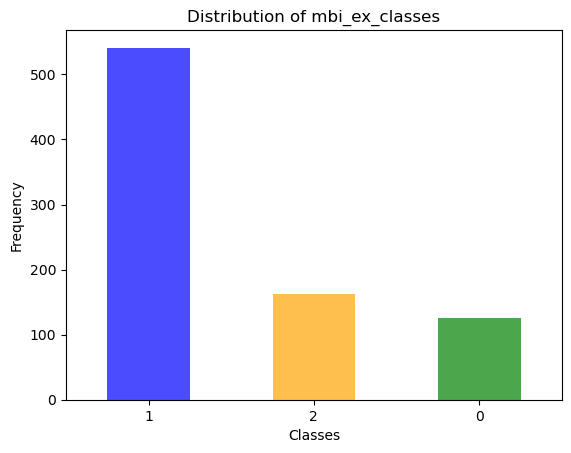

Statistics for mbi_cy_classes:
 count      3.000000
mean     276.666667
std      240.186039
min      136.000000
25%      138.000000
50%      140.000000
75%      347.000000
max      554.000000
Name: count, dtype: float64


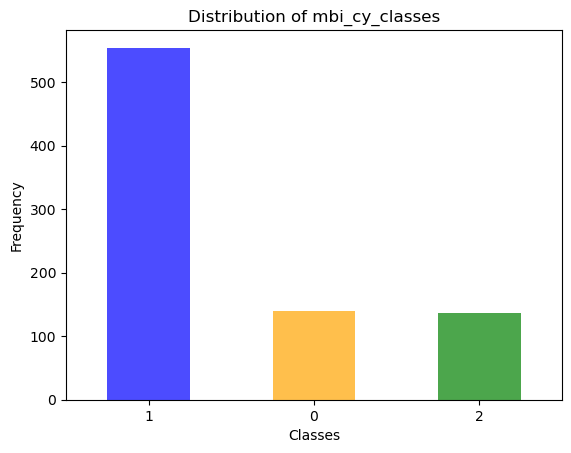

Statistics for mbi_ea_classes:
 count      3.000000
mean     276.666667
std      238.298832
min      121.000000
25%      139.500000
50%      158.000000
75%      354.500000
max      551.000000
Name: count, dtype: float64


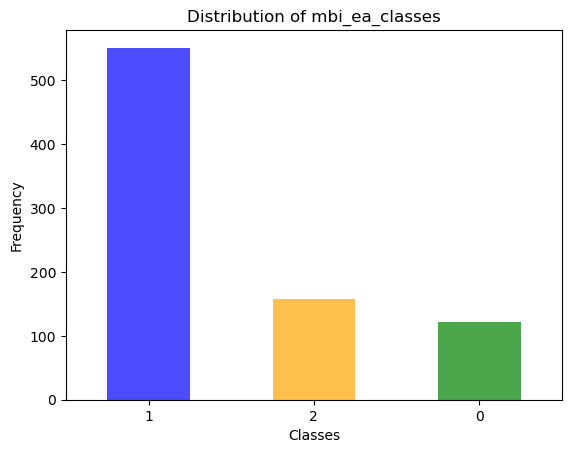

In [2]:
for col in y_classes_cols:
    # Value counts for each class
    value_counts = y_classes[col].value_counts()
    
    # Display value counts statistics
    print(f"Statistics for {col}:\n", value_counts.describe())
    
    # Create a bar plot for better visualization of class distributions
    value_counts.plot(kind='bar', color=['blue', 'orange', 'green'], alpha=0.7)
    
    # Add titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    
    # Display the plot
    plt.xticks(rotation=0)
    plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y_classes, test_size=0.2, random_state=42)

# Logistic Regression

In [4]:
acc_lr = []
acc_rf = []
for col in y_classes_cols:
    print(f"=====  {col}  ======")
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(x_train, y_train[col])
    y_pred_log = log_reg.predict(x_test)

    # Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(x_train, y_train[col])
    y_pred_rf = rf_clf.predict(x_test)

    # Evaluation
    print("Logistic Regression Evaluation:")
    print(classification_report(y_test[col], y_pred_log))
    acc = accuracy_score(y_test[col], y_pred_log)
    acc_lr.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_log))

    print("\nRandom Forest Evaluation:")
    print(classification_report(y_test[col], y_pred_rf))
    acc = accuracy_score(y_test[col], y_pred_rf)
    acc_rf.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_rf))

=====  mbi_ex_classes  ======
Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.77      0.40      0.53        25
           1       0.68      0.92      0.78       101
           2       0.71      0.30      0.42        40

    accuracy                           0.69       166
   macro avg       0.72      0.54      0.58       166
weighted avg       0.70      0.69      0.66       166

Accuracy: 0.6927710843373494
Confusion Matrix:
 [[10 15  0]
 [ 3 93  5]
 [ 0 28 12]]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60        25
           1       0.70      0.91      0.79       101
           2       0.63      0.30      0.41        40

    accuracy                           0.70       166
   macro avg       0.71      0.56      0.60       166
weighted avg       0.70      0.70      0.67       166

Accuracy: 0.6987951807228916
Confusion Matrix:
 [[12 12  1]
 [ 3

In [5]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
multi_log_reg = MultiOutputClassifier(log_reg)
multi_log_reg.fit(x_train, y_train)
y_pred_log_multi = multi_log_reg.predict(x_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_rf_clf = MultiOutputClassifier(rf_clf)
multi_rf_clf.fit(x_train, y_train)
y_pred_rf_multi = multi_rf_clf.predict(x_test)

# Evaluation
for i, col in enumerate(y_classes_cols):
    print(f"\n=== Label: {col} ===")
    print("Logistic Regression Evaluation:")
    print(classification_report(y_test[col], y_pred_log_multi[:, i]))
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_log_multi[:, i]))
    log_acc = accuracy_score(y_test[col], y_pred_log_multi[:, i])
    print(f"Accuracy: {log_acc:.4f}")
    
    print("\nRandom Forest Evaluation:")
    print(classification_report(y_test[col], y_pred_rf_multi[:, i]))
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_rf_multi[:, i]))
    rf_acc = accuracy_score(y_test[col], y_pred_rf_multi[:, i])
    print(f"Accuracy: {rf_acc:.4f}")



=== Label: mbi_ex_classes ===
Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.77      0.40      0.53        25
           1       0.68      0.92      0.78       101
           2       0.71      0.30      0.42        40

    accuracy                           0.69       166
   macro avg       0.72      0.54      0.58       166
weighted avg       0.70      0.69      0.66       166

Confusion Matrix:
 [[10 15  0]
 [ 3 93  5]
 [ 0 28 12]]
Accuracy: 0.6928

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60        25
           1       0.70      0.91      0.79       101
           2       0.63      0.30      0.41        40

    accuracy                           0.70       166
   macro avg       0.71      0.56      0.60       166
weighted avg       0.70      0.70      0.67       166

Confusion Matrix:
 [[12 12  1]
 [ 3 92  6]
 [ 0 28 12]]
Accuracy: 0.6988

=


=== Label: mbi_ex_classes ===
Logistic Regression Accuracy for mbi_ex_classes: 0.6928
Random Forest Accuracy for mbi_ex_classes: 0.6988

=== Label: mbi_cy_classes ===
Logistic Regression Accuracy for mbi_cy_classes: 0.6446
Random Forest Accuracy for mbi_cy_classes: 0.5964

=== Label: mbi_ea_classes ===
Logistic Regression Accuracy for mbi_ea_classes: 0.7048
Random Forest Accuracy for mbi_ea_classes: 0.6566


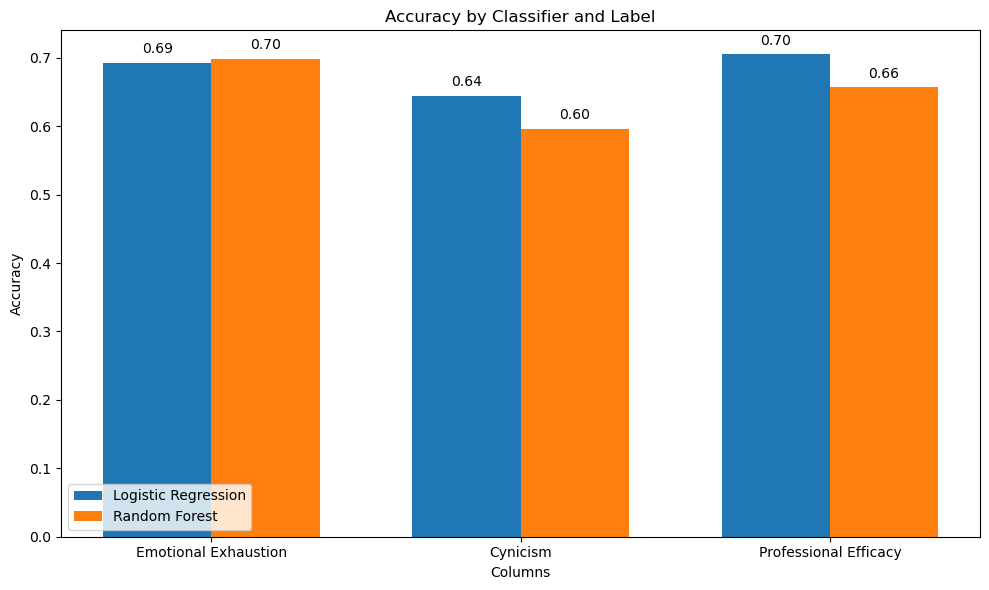

In [6]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Emotional Exhaustion", "Cynicism", "Professional Efficacy"]

# Store accuracies for plotting
accuracies = {"Logistic Regression": [], "Random Forest": []}

for i, col in enumerate(y_classes_cols):
    print(f"\n=== Label: {col} ===")
    
    # Logistic Regression evaluation
    log_acc = accuracy_score(y_test[col], y_pred_log_multi[:, i])
    accuracies["Logistic Regression"].append(log_acc)
    print(f"Logistic Regression Accuracy for {col}: {log_acc:.4f}")
    
    # Random Forest evaluation
    rf_acc = accuracy_score(y_test[col], y_pred_rf_multi[:, i])
    accuracies["Random Forest"].append(rf_acc)
    print(f"Random Forest Accuracy for {col}: {rf_acc:.4f}")

# Plot the accuracies
# labels = y_classes_cols
x_lab = np.arange(len(labels))  # Label indices
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x_lab - width/2, accuracies["Logistic Regression"], width, label='Logistic Regression')
bars2 = ax.bar(x_lab + width/2, accuracies["Random Forest"], width, label='Random Forest')

# Add labels, title, and legend
ax.set_xlabel('Columns')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Classifier and Label')
ax.set_xticks(x_lab)
ax.set_xticklabels(labels)
ax.legend(loc=3)

# Display accuracy values on top of bars
for bar_group in [bars1, bars2]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


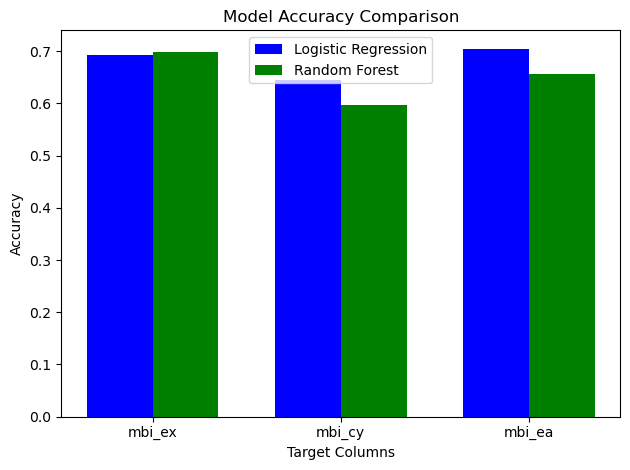

In [7]:
bar_width = 0.35
x_labels = y_cols
x_bar = range(len(x_labels))

plt.bar(x_bar, acc_lr, width=bar_width, label='Logistic Regression', color='b')
plt.bar([p + bar_width for p in x_bar], acc_rf, width=bar_width, label='Random Forest', color='g')

plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([p + bar_width / 2 for p in x_bar], x_labels)
plt.legend()
plt.tight_layout()

plt.show()

## Test Scaler data

In [9]:
from imblearn.over_sampling import SMOTE
# mean of 0 and std of 1 data transformation
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
acc_lr_scaled = []
acc_rf_scaled = []
for col in y_classes_cols:
    smote = SMOTE(random_state=42)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train[col])
    print(f"=====  {col}  ======")
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(x_train_resampled, y_train_resampled)
    y_pred_log = log_reg.predict(x_test_scaled)

    # Random Forest Classifier
    rf_clf_scale = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf_scale.fit(x_train_resampled, y_train_resampled)
    y_pred_rf = rf_clf_scale.predict(x_test_scaled)

    # Evaluation
    print("Logistic Regression Evaluation:")
    print(classification_report(y_test[col], y_pred_log))
    acc = accuracy_score(y_test[col], y_pred_log)
    acc_lr_scaled.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_log))

    print("\nRandom Forest Evaluation:")
    print(classification_report(y_test[col], y_pred_rf))
    acc = accuracy_score(y_test[col], y_pred_rf)
    acc_rf_scaled.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_rf))

=====  mbi_ex_classes  ======
Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.35      0.68      0.46        25
           1       0.68      0.47      0.55       101
           2       0.40      0.47      0.43        40

    accuracy                           0.50       166
   macro avg       0.47      0.54      0.48       166
weighted avg       0.56      0.50      0.51       166

Accuracy: 0.5
Confusion Matrix:
 [[17  6  2]
 [27 47 27]
 [ 5 16 19]]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58        25
           1       0.69      0.83      0.75       101
           2       0.57      0.30      0.39        40

    accuracy                           0.66       166
   macro avg       0.62      0.56      0.58       166
weighted avg       0.65      0.66      0.64       166

Accuracy: 0.6626506024096386
Confusion Matrix:
 [[14 10  1]
 [ 9 84  8]
 [ 0 28

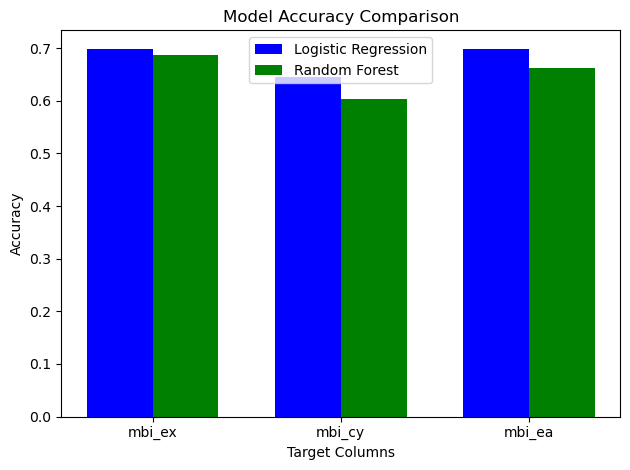

In [10]:
bar_width = 0.35
x_labels = y_cols
x_bar = range(len(x_labels))

plt.bar(x_bar, acc_lr_scaled, width=bar_width, label='Logistic Regression', color='b')
plt.bar([p + bar_width for p in x_bar], acc_rf_scaled, width=bar_width, label='Random Forest', color='g')

plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([p + bar_width / 2 for p in x_bar], x_labels)
plt.legend()
plt.tight_layout()

plt.show()

## Test PCA

Explained Variance Ratio of PCA Components:
Principal Component 1: 0.1759
Principal Component 2: 0.1411
Principal Component 3: 0.0990
Principal Component 4: 0.0758
Principal Component 5: 0.0639
Principal Component 6: 0.0600
Principal Component 7: 0.0574
Principal Component 8: 0.0551
Principal Component 9: 0.0477


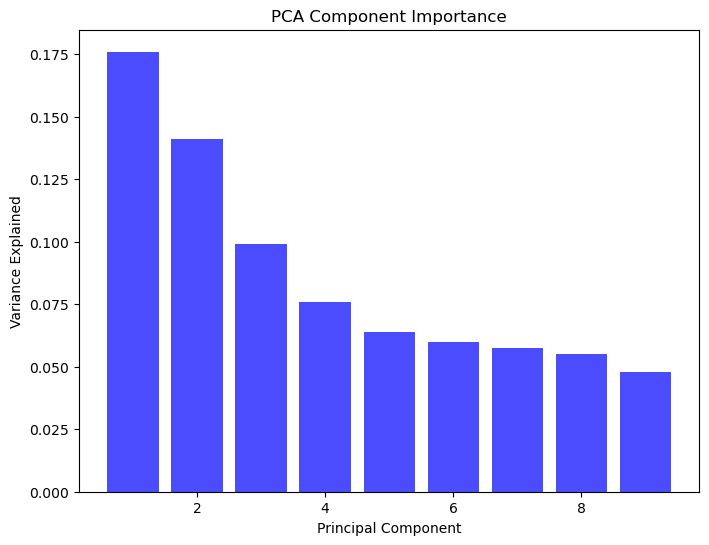

In [11]:
# PCA 
pca = PCA(n_components=9)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Print Explained Variance Ratio
print("Explained Variance Ratio of PCA Components:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i + 1}: {ratio:.4f}")

# Visualize the importance of each PCA component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='b')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Component Importance')
plt.show()

In [12]:
acc_lr_pca = []
acc_rf_pca = []
for col in y_classes_cols:
    print(f"=====  {col}  ======")
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(x_train_pca, y_train[col])
    y_pred_log = log_reg.predict(x_test_pca)

    # Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(x_train_pca, y_train[col])
    y_pred_rf = rf_clf.predict(x_test_pca)

    # Evaluation
    print("Logistic Regression Evaluation:")
    print(classification_report(y_test[col], y_pred_log))
    acc = accuracy_score(y_test[col], y_pred_log)
    acc_lr_pca.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_log))

    print("\nRandom Forest Evaluation:")
    print(classification_report(y_test[col], y_pred_rf))
    acc = accuracy_score(y_test[col], y_pred_rf)
    acc_rf_pca.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_rf))

=====  mbi_ex_classes  ======
Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.40      0.54        25
           1       0.67      0.96      0.79       101
           2       0.78      0.17      0.29        40

    accuracy                           0.69       166
   macro avg       0.76      0.51      0.54       166
weighted avg       0.72      0.69      0.63       166

Accuracy: 0.6867469879518072
Confusion Matrix:
 [[10 15  0]
 [ 2 97  2]
 [ 0 33  7]]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.64      0.28      0.39        25
           1       0.65      0.92      0.77       101
           2       0.62      0.20      0.30        40

    accuracy                           0.65       166
   macro avg       0.64      0.47      0.49       166
weighted avg       0.64      0.65      0.60       166

Accuracy: 0.6506024096385542
Confusion Matrix:
 [[ 7 17  1]
 [ 4

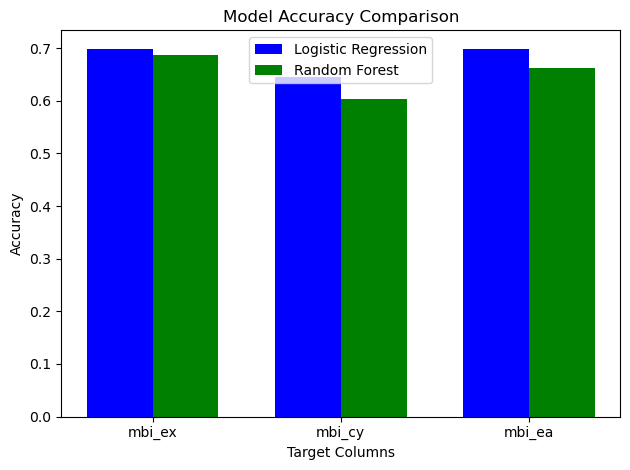

In [13]:
bar_width = 0.35
x_labels = y_cols
x_bar = range(len(x_labels))

plt.bar(x_bar, acc_lr_scaled, width=bar_width, label='Logistic Regression', color='b')
plt.bar([p + bar_width for p in x_bar], acc_rf_scaled, width=bar_width, label='Random Forest', color='g')

plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([p + bar_width / 2 for p in x_bar], x_labels)
plt.legend()
plt.tight_layout()

plt.show()

# Linear Regression + Random Forest parameterize

In [14]:
# Define hyperparameter grids
param_grid_lr = {
    'C': [0.1, 1, 10],                  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],   # Solvers for optimization
    'multi_class': ['auto']             # Handles multi-class classification
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [None, 10, 20],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples at a leaf node
}

print("=== Logistic Regression Hyperparameter Tuning ===")
for target in y_classes_cols:
    lr = LogisticRegression()
    grid_lr = GridSearchCV(lr, param_grid_lr, scoring='accuracy', cv=3, n_jobs=-1)
    grid_lr.fit(x_train_scaled, y_train[target])
    best_lr = grid_lr.best_estimator_
    y_pred_lr = best_lr.predict(x_test_scaled)
    print(f"Target: {target}")
    print(f"Best Parameters: {grid_lr.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test[target], y_pred_lr):.4f}")
    print("Classification Report:\n", classification_report(y_test[target], y_pred_lr))

print("\n=== Random Forest Hyperparameter Tuning ===")
for target in y_classes_cols:
    rf = RandomForestClassifier(random_state=42)
    grid_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy', cv=3, n_jobs=-1)
    grid_rf.fit(x_train_scaled, y_train[target])
    best_rf = grid_rf.best_estimator_
    y_pred_rf = best_rf.predict(x_test_scaled)
    print(f"Target: {target}")
    print(f"Best Parameters: {grid_rf.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test[target], y_pred_rf):.4f}")
    print("Classification Report:\n", classification_report(y_test[target], y_pred_rf))


=== Logistic Regression Hyperparameter Tuning ===


d:\downloads\programs\anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\downloads\programs\anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\downloads\programs\anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Target: mbi_ex_classes
Best Parameters: {'C': 0.1, 'multi_class': 'auto', 'solver': 'lbfgs'}
Accuracy: 0.6988
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.40      0.54        25
           1       0.68      0.94      0.79       101
           2       0.73      0.28      0.40        40

    accuracy                           0.70       166
   macro avg       0.75      0.54      0.58       166
weighted avg       0.72      0.70      0.66       166

Target: mbi_cy_classes
Best Parameters: {'C': 0.1, 'multi_class': 'auto', 'solver': 'lbfgs'}
Accuracy: 0.6446
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.06      0.11        32
           1       0.64      0.97      0.77       100
           2       0.80      0.24      0.36        34

    accuracy                           0.64       166
   macro avg       0.65      0.42      0.41       166
weighted avg       0.64  

# Feature importance

In [15]:
print(f"==== Logistic regression: ==== \nnormal: \n{acc_lr} \nscaled: \n{acc_lr_scaled} \npca: \n{acc_lr_pca}")
print(f"\n\n==== Random forest: ==== \nnormal: \n{acc_rf} \nscaled: \n{acc_rf_scaled} \npca: \n{acc_rf_pca}")

==== Logistic regression: ==== 
normal: 
[0.6927710843373494, 0.6445783132530121, 0.7048192771084337] 
scaled: 
[0.6987951807228916, 0.6445783132530121, 0.6987951807228916] 
pca: 
[0.6867469879518072, 0.6144578313253012, 0.6807228915662651]


==== Random forest: ==== 
normal: 
[0.6987951807228916, 0.5963855421686747, 0.6566265060240963] 
scaled: 
[0.6867469879518072, 0.6024096385542169, 0.6626506024096386] 
pca: 
[0.6506024096385542, 0.5783132530120482, 0.6566265060240963]


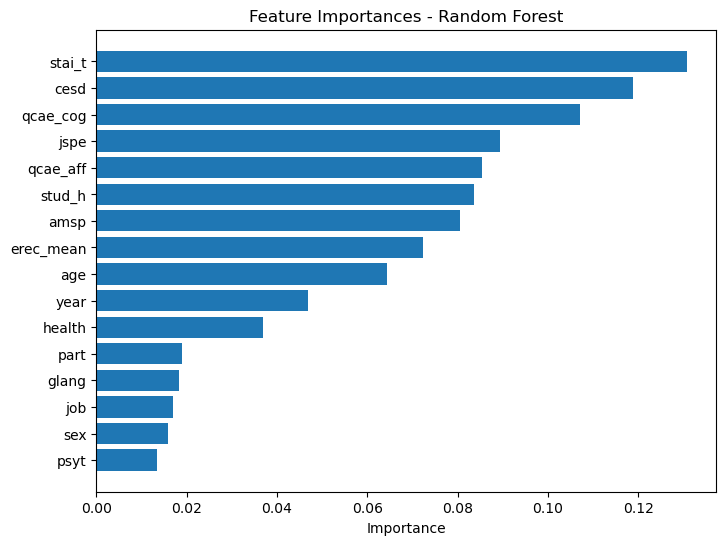

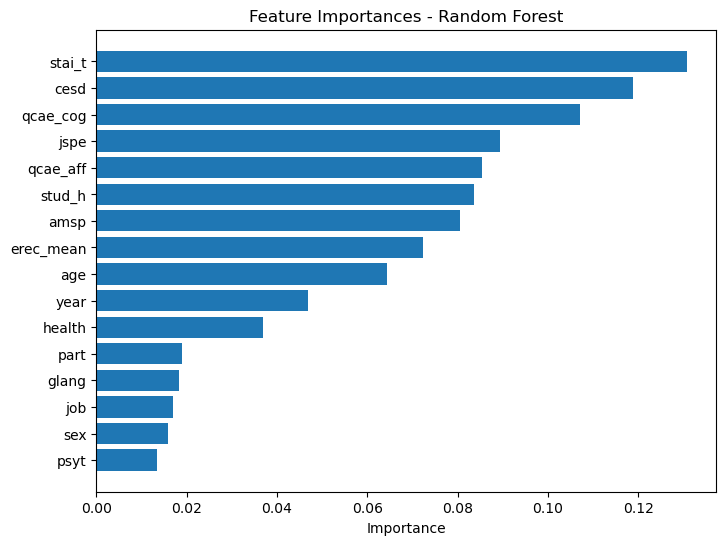

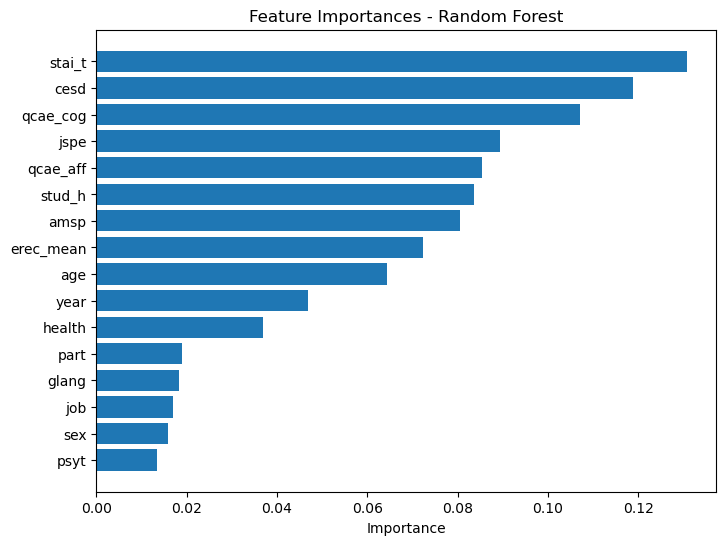

In [16]:
for target in y_cols:
    feature_importances = rf_clf_scale.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(x.columns)[sorted_idx])
    plt.title(f"Feature Importances - Random Forest")
    plt.xlabel("Importance")
    plt.show()


In [17]:
importance = np.array(x.columns)[sorted_idx]
least = 5

print(f"5 least important columns: {importance[:least]}")
x_drops = x.drop(columns=importance[:least])
x_drops.head(5)

5 least important columns: ['psyt' 'sex' 'job' 'glang' 'part']


,age,year,stud_h,health,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t
0,26,4,20,4,109,55,37,22,0.690476,7,33
1,21,3,36,3,106,64,39,17,0.690476,25,73
2,21,2,51,5,101,52,33,18,0.833333,17,48
3,21,3,22,4,102,58,28,21,0.690476,14,46
4,26,5,10,2,102,48,37,17,0.690476,14,56


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_drops, y_classes, test_size=0.2, random_state=42)

acc_lr_drops = []
acc_rf_drops = []
for col in y_classes_cols:
    print(f"=====  {col}  ======")
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(x_train, y_train[col])
    y_pred_log = log_reg.predict(x_test)

    # Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(x_train, y_train[col])
    y_pred_rf = rf_clf.predict(x_test)

    # Evaluation
    print("Logistic Regression Evaluation:")
    print(classification_report(y_test[col], y_pred_log))
    acc = accuracy_score(y_test[col], y_pred_log)
    acc_lr_drops.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_log))

    print("\nRandom Forest Evaluation:")
    print(classification_report(y_test[col], y_pred_rf))
    acc = accuracy_score(y_test[col], y_pred_rf)
    acc_rf_drops.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test[col], y_pred_rf))

=====  mbi_ex_classes  ======
Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.75      0.36      0.49        25
           1       0.68      0.93      0.79       101
           2       0.75      0.30      0.43        40

    accuracy                           0.69       166
   macro avg       0.73      0.53      0.57       166
weighted avg       0.71      0.69      0.66       166

Accuracy: 0.6927710843373494
Confusion Matrix:
 [[ 9 16  0]
 [ 3 94  4]
 [ 0 28 12]]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.75      0.48      0.59        25
           1       0.69      0.92      0.79       101
           2       0.67      0.25      0.36        40

    accuracy                           0.69       166
   macro avg       0.70      0.55      0.58       166
weighted avg       0.69      0.69      0.66       166

Accuracy: 0.6927710843373494
Confusion Matrix:
 [[12 12  1]
 [ 4

=====  mbi_ex_classes  ======
Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.75      0.36      0.49        25
           1       0.68      0.93      0.79       101
           2       0.75      0.30      0.43        40

    accuracy                           0.69       166
   macro avg       0.73      0.53      0.57       166
weighted avg       0.71      0.69      0.66       166

Accuracy: 0.6927710843373494
Confusion Matrix:
 [[ 9 16  0]
 [ 3 94  4]
 [ 0 28 12]]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.75      0.48      0.59        25
           1       0.69      0.92      0.79       101
           2       0.67      0.25      0.36        40

    accuracy                           0.69       166
   macro avg       0.70      0.55      0.58       166
weighted avg       0.69      0.69      0.66       166

Accuracy: 0.6927710843373494
Confusion Matrix:
 [[12 12  1]
 [ 4

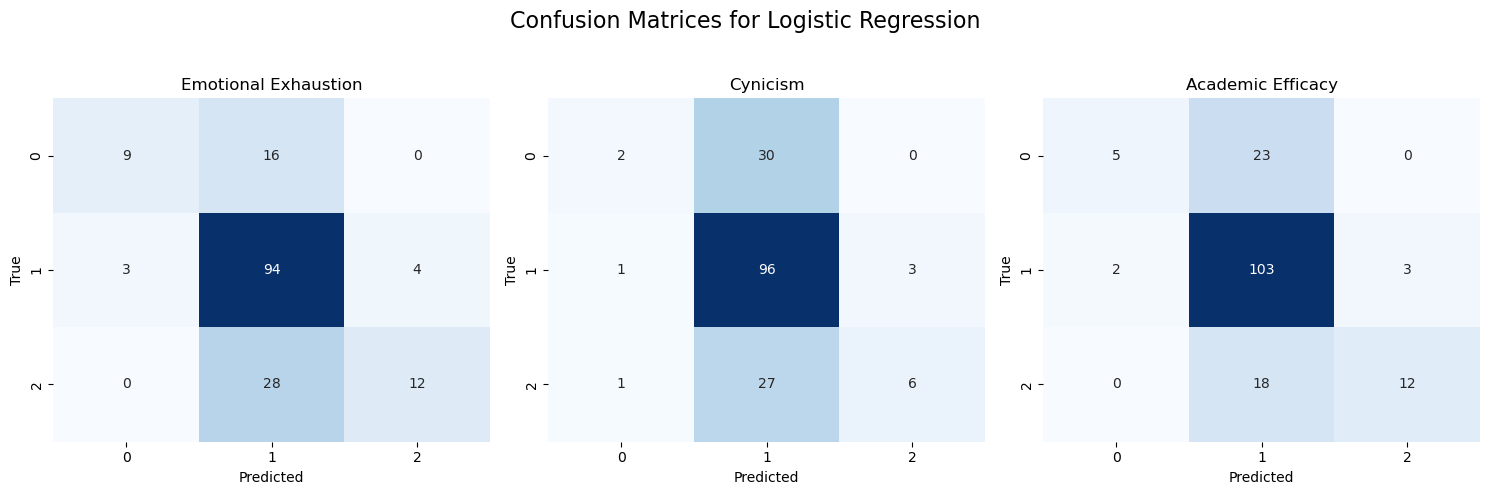

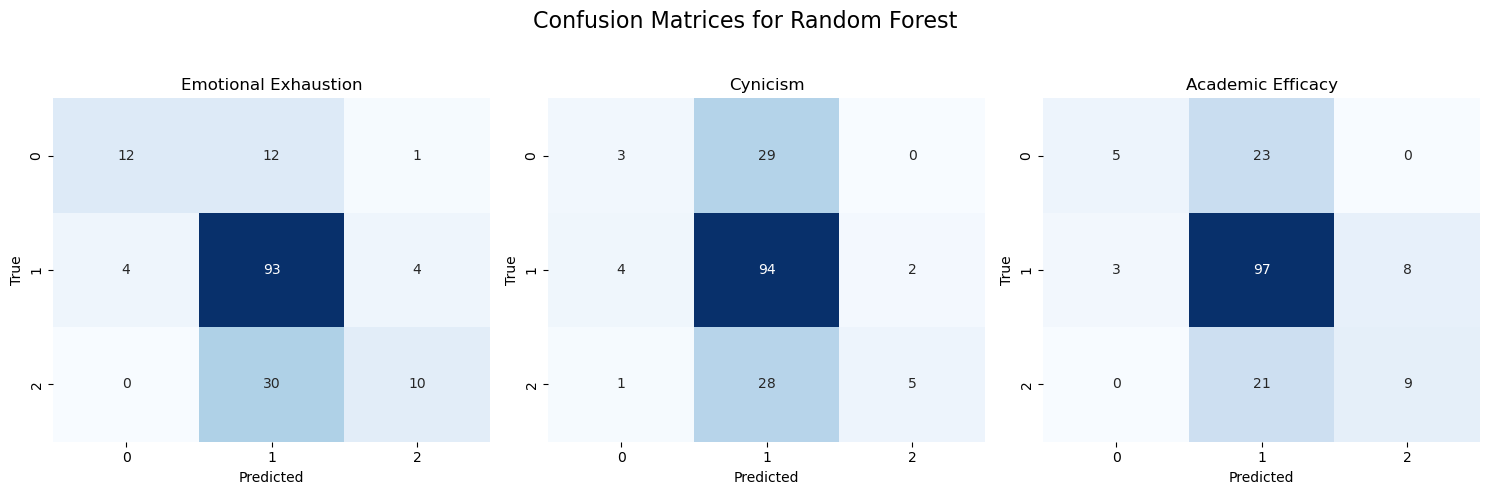

In [22]:
# Initialize lists to store confusion matrices
confusion_matrices_lr = []
confusion_matrices_rf = []

for col in y_classes_cols:
    print(f"=====  {col}  ======")
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(x_train, y_train[col])
    y_pred_log = log_reg.predict(x_test)
    cm_log = confusion_matrix(y_test[col], y_pred_log)
    confusion_matrices_lr.append(cm_log)

    # Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(x_train, y_train[col])
    y_pred_rf = rf_clf.predict(x_test)
    cm_rf = confusion_matrix(y_test[col], y_pred_rf)
    confusion_matrices_rf.append(cm_rf)

    # Evaluation
    print("Logistic Regression Evaluation:")
    print(classification_report(y_test[col], y_pred_log))
    acc = accuracy_score(y_test[col], y_pred_log)
    acc_lr_drops.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm_log)

    print("\nRandom Forest Evaluation:")
    print(classification_report(y_test[col], y_pred_rf))
    acc = accuracy_score(y_test[col], y_pred_rf)
    acc_rf_drops.append(acc)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm_rf)

y_classes_cols = ["Emotional Exhaustion", "Cynicism", "Academic Efficacy"]

# Plot confusion matrices for Logistic Regression
fig, axes = plt.subplots(1, len(y_classes_cols), figsize=(15, 5))
fig.suptitle('Confusion Matrices for Logistic Regression', fontsize=16)

for i, cm in enumerate(confusion_matrices_lr):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(y_classes_cols[i])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot confusion matrices for Random Forest
fig, axes = plt.subplots(1, len(y_classes_cols), figsize=(15, 5))
fig.suptitle('Confusion Matrices for Random Forest', fontsize=16)

for i, cm in enumerate(confusion_matrices_rf):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(y_classes_cols[i])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [20]:
print(f"==== Logistic regression: ==== \nnormal: \n{acc_lr} \nscaled: \n{acc_lr_scaled} \npca: \n{acc_lr_pca} \ndropped cols: \n{acc_lr_drops}")
print(f"\n\n==== Random forest: ==== \nnormal: \n{acc_rf} \nscaled: \n{acc_rf_scaled} \npca: \n{acc_rf_pca} \ndropped cols: \n{acc_lr_drops}")

==== Logistic regression: ==== 
normal: 
[0.6927710843373494, 0.6445783132530121, 0.7048192771084337] 
scaled: 
[0.6987951807228916, 0.6445783132530121, 0.6987951807228916] 
pca: 
[0.6867469879518072, 0.6144578313253012, 0.6807228915662651] 
dropped cols: 
[0.6927710843373494, 0.6265060240963856, 0.7228915662650602, 0.6927710843373494, 0.6265060240963856, 0.7228915662650602]


==== Random forest: ==== 
normal: 
[0.6987951807228916, 0.5963855421686747, 0.6566265060240963] 
scaled: 
[0.6867469879518072, 0.6024096385542169, 0.6626506024096386] 
pca: 
[0.6506024096385542, 0.5783132530120482, 0.6566265060240963] 
dropped cols: 
[0.6927710843373494, 0.6265060240963856, 0.7228915662650602, 0.6927710843373494, 0.6265060240963856, 0.7228915662650602]


In [21]:
# Define hyperparameter grids
param_grid_lr = {
    'C': [0.1, 1, 10],                  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],   # Solvers for optimization
    'multi_class': ['auto']             # Handles multi-class classification
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [None, 10, 20],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples at a leaf node
}

print("=== Logistic Regression Hyperparameter Tuning ===")
for target in y_classes_cols:
    lr = LogisticRegression()
    grid_lr = GridSearchCV(lr, param_grid_lr, scoring='accuracy', cv=3, n_jobs=-1)
    grid_lr.fit(x_train, y_train[target])
    best_lr = grid_lr.best_estimator_
    y_pred_lr = best_lr.predict(x_test)
    print(f"Target: {target}")
    print(f"Best Parameters: {grid_lr.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test[target], y_pred_lr):.4f}")
    print("Classification Report:\n", classification_report(y_test[target], y_pred_lr))

print("\n=== Random Forest Hyperparameter Tuning ===")
for target in y_classes_cols:
    rf = RandomForestClassifier(random_state=42)
    grid_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy', cv=3, n_jobs=-1)
    grid_rf.fit(x_train, y_train[target])
    best_rf = grid_rf.best_estimator_
    y_pred_rf = best_rf.predict(x_test)
    print(f"Target: {target}")
    print(f"Best Parameters: {grid_rf.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test[target], y_pred_rf):.4f}")
    print("Classification Report:\n", classification_report(y_test[target], y_pred_rf))

=== Logistic Regression Hyperparameter Tuning ===
Target: mbi_ex_classes
Best Parameters: {'C': 1, 'multi_class': 'auto', 'solver': 'lbfgs'}
Accuracy: 0.6928
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.40      0.54        25
           1       0.68      0.93      0.79       101
           2       0.69      0.28      0.39        40

    accuracy                           0.69       166
   macro avg       0.73      0.54      0.57       166
weighted avg       0.71      0.69      0.65       166



d:\downloads\programs\anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\downloads\programs\anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\downloads\programs\anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be re

Target: mbi_cy_classes
Best Parameters: {'C': 10, 'multi_class': 'auto', 'solver': 'liblinear'}
Accuracy: 0.6446
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.06      0.11        32
           1       0.63      0.99      0.77       100
           2       0.86      0.18      0.29        34

    accuracy                           0.64       166
   macro avg       0.72      0.41      0.39       166
weighted avg       0.69      0.64      0.55       166

Target: mbi_ea_classes
Best Parameters: {'C': 10, 'multi_class': 'auto', 'solver': 'liblinear'}
Accuracy: 0.6928
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.11      0.19        28
           1       0.68      0.98      0.81       108
           2       0.86      0.20      0.32        30

    accuracy                           0.69       166
   macro avg       0.76      0.43      0.44       166
weighted avg       

d:\downloads\programs\anaconda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Target: mbi_ex_classes
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.6807
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.44      0.55        25
           1       0.68      0.92      0.78       101
           2       0.64      0.23      0.33        40

    accuracy                           0.68       166
   macro avg       0.69      0.53      0.55       166
weighted avg       0.68      0.68      0.64       166

Target: mbi_cy_classes
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6024
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.09      0.15        32
           1       0.62      0.94      0.75       100
           2       0.50      0.09      0.15        34

    accuracy                           0.60       166
   macro avg